In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.optimizers import RMSprop

data_dir = 'D:/DatasetMuseumFix/'

# Image data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Training dataset
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    subset='training'
)

# Validation dataset
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    subset='validation'
)


Found 4188 images belonging to 13 classes.
Found 1794 images belonging to 13 classes.


In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20
131/131 [==============================] - 535s 4s/step - loss: 0.7464 - accuracy: 0.7911 - val_loss: 1.0666 - val_accuracy: 0.6656
Epoch 2/20
131/131 [==============================] - 462s 4s/step - loss: 0.1150 - accuracy: 0.9656 - val_loss: 0.9276 - val_accuracy: 0.8690
Epoch 3/20
131/131 [==============================] - 521s 4s/step - loss: 0.0948 - accuracy: 0.9713 - val_loss: 1.5438 - val_accuracy: 0.8099
Epoch 4/20
131/131 [==============================] - 543s 4s/step - loss: 0.0498 - accuracy: 0.9864 - val_loss: 0.9914 - val_accuracy: 0.8540
Epoch 5/20
131/131 [==============================] - 488s 4s/step - loss: 0.0273 - accuracy: 0.9924 - val_loss: 0.8869 - val_accuracy: 0.8902
Epoch 6/20
131/131 [==============================] - 598s 5s/step - loss: 0.0248 - accuracy: 0.9928 - val_loss: 1.2074 - val_accuracy: 0.8456
Epoch 7/20
131/131 [==============================] - 706s 5s/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.9292 - val_accuracy: 0.8735

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

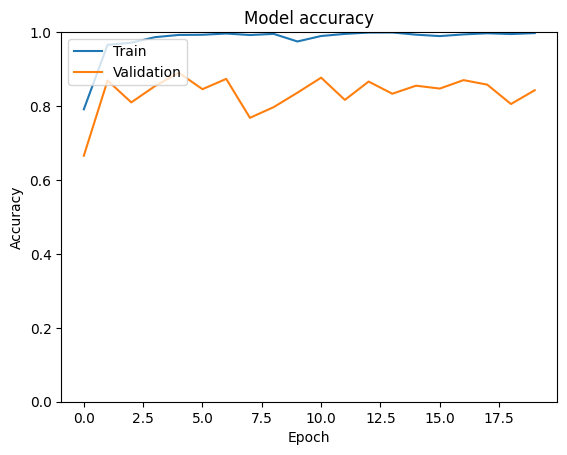

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 1])
plt.show()


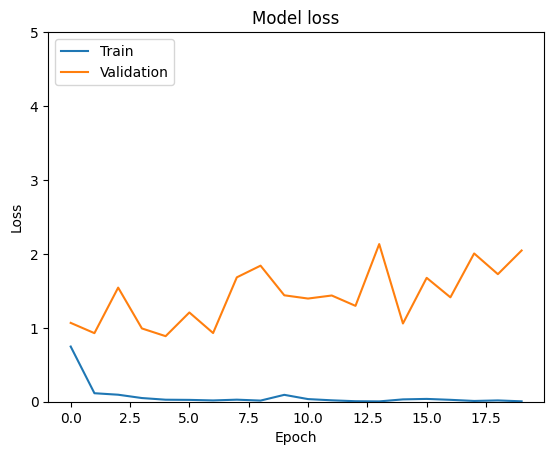

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 5])
plt.show()

In [40]:
from PIL import Image
import os


path = 'D:/DatasetMuseum/PaintingMenyambutProklamasiKemerdekaanRI/00190.jpg'

img = Image.open(path).convert('RGB')
img = img.resize((224, 224))
img_array = np.array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0) 
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print("Predicted Class:", predicted_class)

if predicted_class==1:
    print("Bali Following Independence")
elif predicted_class==2:
    print("Dang Hyang Nirartha")
elif predicted_class==3:
    print("Sagung Wah In Preparation To Attack The Dutch")
elif predicted_class==4:
    print("Spreading The News of The Proclamation of Indonesia")
elif predicted_class==5:
    print("The Battle of Jagaraga")
elif predicted_class==6:
    print("The Crowning Of Sri Kresna Kepakisan")
elif predicted_class==7:
    print("The Establishment Of Indonesian People Struggling Board Of Sunda Kecil")
elif predicted_class==8:
    print("The Naval Battle In Bali Strait")
elif predicted_class==9:
    print("The Rise Of Youth Organization")
elif predicted_class==10:
    print("Painting I Gusti Ngurah Rai")
elif predicted_class==11:
    print("Painting Menyambut Proklamasi Kemerdekaan RI")
elif predicted_class==12:
    print("Painting Ngurah Rai Mengatur Siasat Tempur")
else:
    print("RandomData")

1/1 [==============================] - 0s 83ms/step
Predicted Class: 11
Painting Menyambut Proklamasi Kemerdekaan RI


In [44]:
folder = 'D:/TestingGambarRandom/sculpture'
dirs = os.listdir(folder)
print(folder)

for item in dirs:
    fullpath = os.path.join(folder, item)
    if os.path.isfile(fullpath):
        img = Image.open(fullpath).convert('RGB')
        img = img.resize((224, 224))
        img_array = np.array(img) / 255.0 
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)
        print("Predicted Class:", predicted_class)

        if predicted_class==1:
            print("Bali Following Independence")
        elif predicted_class==2:
            print("Dang Hyang Nirartha")
        elif predicted_class==3:
            print("Sagung Wah In Preparation To Attack The Dutch")
        elif predicted_class==4:
            print("Spreading The News of The Proclamation of Indonesia")
        elif predicted_class==5:
            print("The Battle of Jagaraga")
        elif predicted_class==6:
            print("The Crowning Of Sri Kresna Kepakisan")
        elif predicted_class==7:
            print("The Establishment Of Indonesian People Struggling Board Of Sunda Kecil")
        elif predicted_class==8:
            print("The Naval Battle In Bali Strait")
        elif predicted_class==9:
            print("The Rise Of Youth Organization")
        elif predicted_class==10:
            print("Painting I Gusti Ngurah Rai")
        elif predicted_class==11:
            print("Painting Menyambut Proklamasi Kemerdekaan RI")
        elif predicted_class==12:
            print("Painting Ngurah Rai Mengatur Siasat Tempur")
        else:
            print("RandomData")

D:/TestingGambarRandom/sculpture
1/1 [==============================] - 0s 76ms/step
Predicted Class: 10
Painting I Gusti Ngurah Rai
1/1 [==============================] - 0s 75ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 66ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 71ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 73ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 67ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 78ms/step
Predicted Class: 11
Painting Menyambut Proklamasi Kemerdekaan RI
1/1 [==============================] - 0s 83ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 80ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 100ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 76ms/step
Predicted Class: 0
RandomData
1/1 [======

In [48]:
from tensorflow.keras.models import load_model

model.save('test_model.h5')
loaded_model = load_model('test_model.h5')

In [49]:
import pathlib

export_dir = 'C:/Users/user/miniconda3/CapstoneProject'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('C:/Users/user/miniconda3/CapstoneProject/test.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:/Users/user/miniconda3/CapstoneProject\assets


INFO:tensorflow:Assets written to: C:/Users/user/miniconda3/CapstoneProject\assets


88996232